In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

from models.bsw import PseudoscalarBSW, VectorBSW
from detectors.sabre import SABRE
from constants import *

import multihist as mh

In [2]:
Det = SABRE()
Pseudoscalar = PseudoscalarBSW()
Vector = VectorBSW()

In [3]:
masses = [200, 800]
colors = ['blue', 'darkred']
ref_gae = 1e-12
ref_kappa = 1e-12

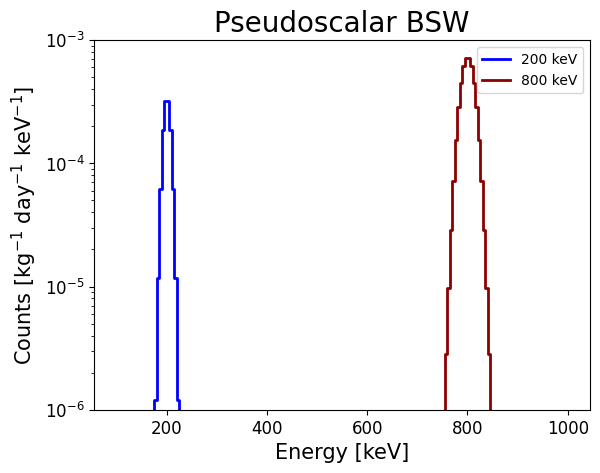

In [4]:
energy_edges = np.arange(100., 1005., 5.)

for mass, color in zip(masses, colors):
    rate_edges = np.array([Det.dRdE_True(mass, Pseudoscalar.dRdER, NR=False, mX=mass * keV, g_ae=ref_gae)
                           * Det.Res(e, mass) for e in energy_edges])
    rate_centers = 0.5 * (rate_edges[1:] + rate_edges[:-1])
    hist = mh.Histdd.from_histogram(histogram=rate_centers, bin_edges=[energy_edges])
    hist.plot(color=color, linewidth=2)
    
plt.legend(['200 keV', '800 keV'])

plt.yscale('log')
plt.ylim(1e-6, 1e-3)

plt.xlabel('Energy [keV]')
plt.ylabel(r'Counts [kg$^{-1}$ day$^{-1}$ keV$^{-1}$]')
plt.title(r'Pseudoscalar BSW', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax = plt.gca()
ax.xaxis.get_label().set_fontsize(15)
ax.yaxis.get_label().set_fontsize(15)

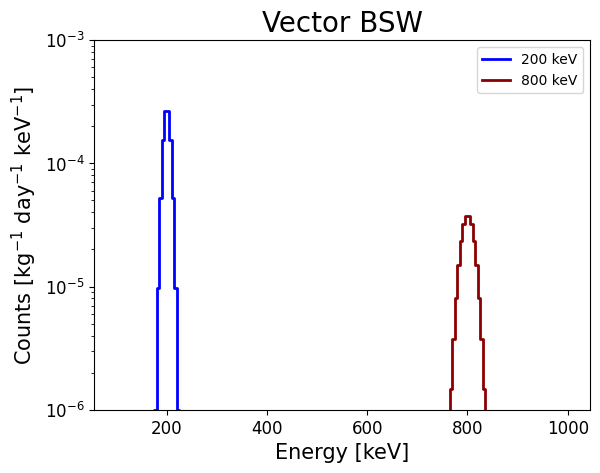

In [5]:
energy_edges = np.arange(100., 1005., 5.)

for mass, color in zip(masses, colors):
    rate_edges = np.array([Det.dRdE_True(mass, Vector.dRdER, NR=False, mX=mass * keV, kappa=ref_kappa)
                           * Det.Res(e, mass) for e in energy_edges])
    rate_centers = 0.5 * (rate_edges[1:] + rate_edges[:-1])
    hist = mh.Histdd.from_histogram(histogram=rate_centers, bin_edges=[energy_edges])
    hist.plot(color=color, linewidth=2)
    
plt.legend(['200 keV', '800 keV'])

plt.yscale('log')
plt.ylim(1e-6, 1e-3)

plt.xlabel('Energy [keV]')
plt.ylabel(r'Counts [kg$^{-1}$ day$^{-1}$ keV$^{-1}$]')
plt.title(r'Vector BSW', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax = plt.gca()
ax.xaxis.get_label().set_fontsize(15)
ax.yaxis.get_label().set_fontsize(15)